<a href="https://colab.research.google.com/github/juvana81/Parkinsons-Disease-Detection-/blob/main/Parkinsons_Data_analysis_and_visulaization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
from google.colab import files
uploaded = files.upload()


Saving parkinsons.csv to parkinsons.csv


To display all the Colums of the Parkinsons Dataset

In [4]:

df = pd.read_csv("parkinsons.csv")  # Replace with the actual filename
df.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

Data Distribution and histograms

<Figure size 1200x600 with 0 Axes>

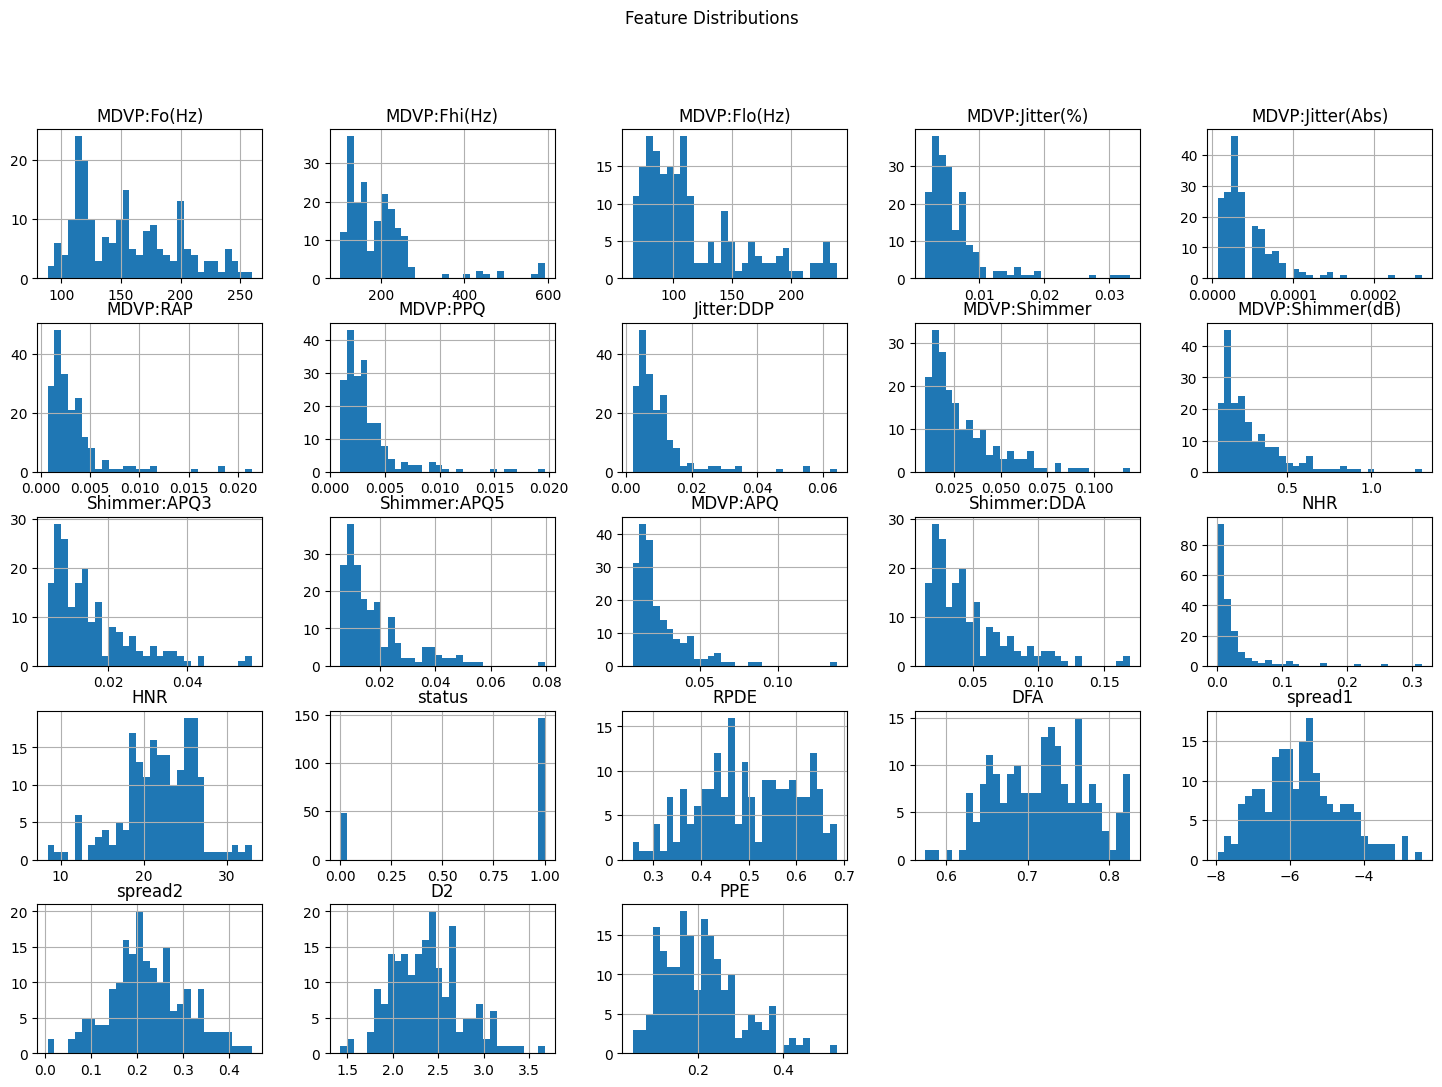

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
df.hist(figsize=(18, 12), bins=30)
plt.suptitle('Feature Distributions')
plt.show()

Corelation Heatmap

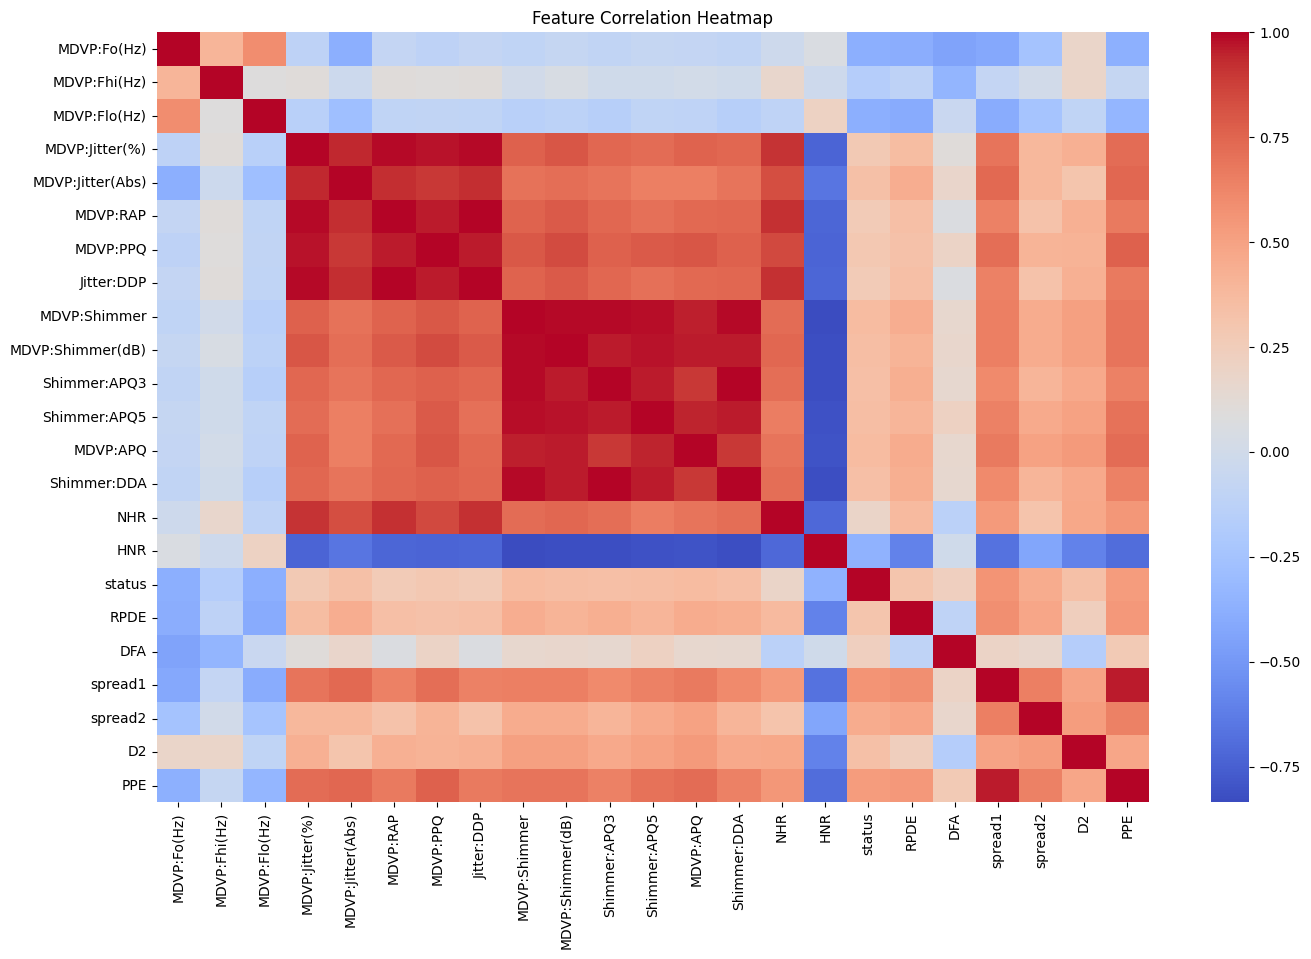

In [8]:
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(16,10))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Distribution of Target Variable

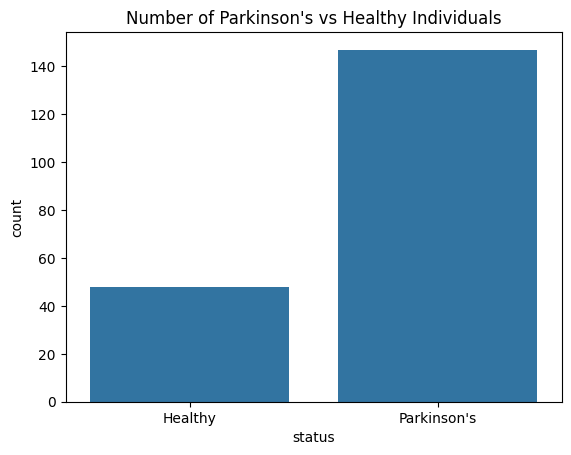

In [11]:
sns.countplot(x='status', data=df)
plt.title("Number of Parkinson's vs Healthy Individuals")
plt.xticks([0, 1], ['Healthy', 'Parkinson\'s'])
plt.show()


Boxplot with respect to different features

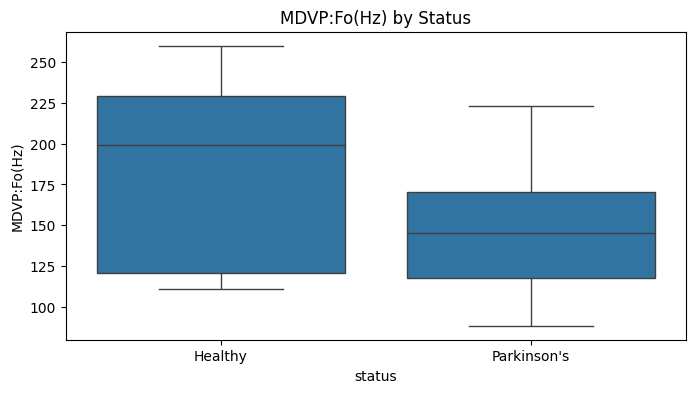

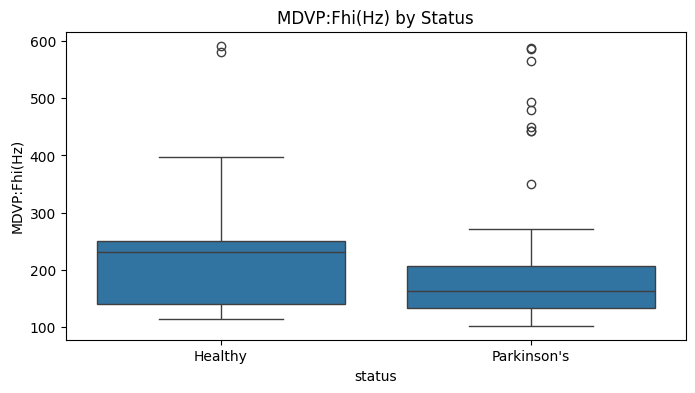

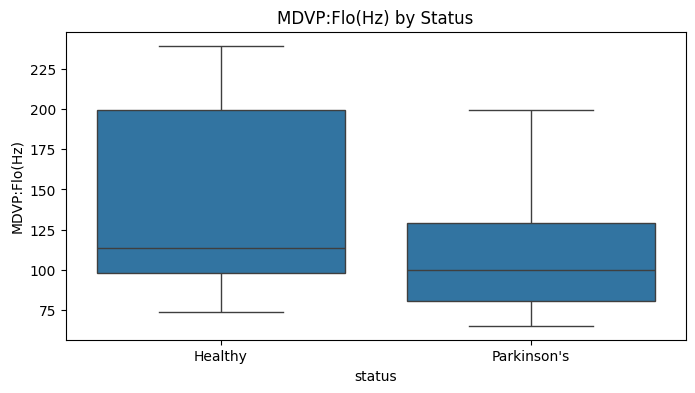

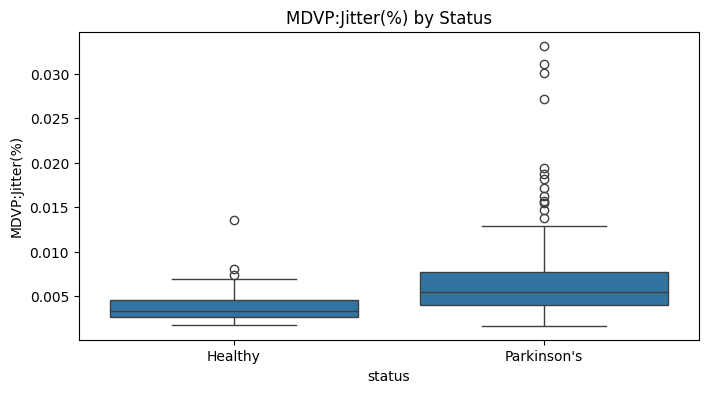

In [12]:
features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)']
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='status', y=feature, data=df)
    plt.title(f'{feature} by Status')
    plt.xticks([0, 1], ['Healthy', 'Parkinson\'s'])
    plt.show()


Pair plot

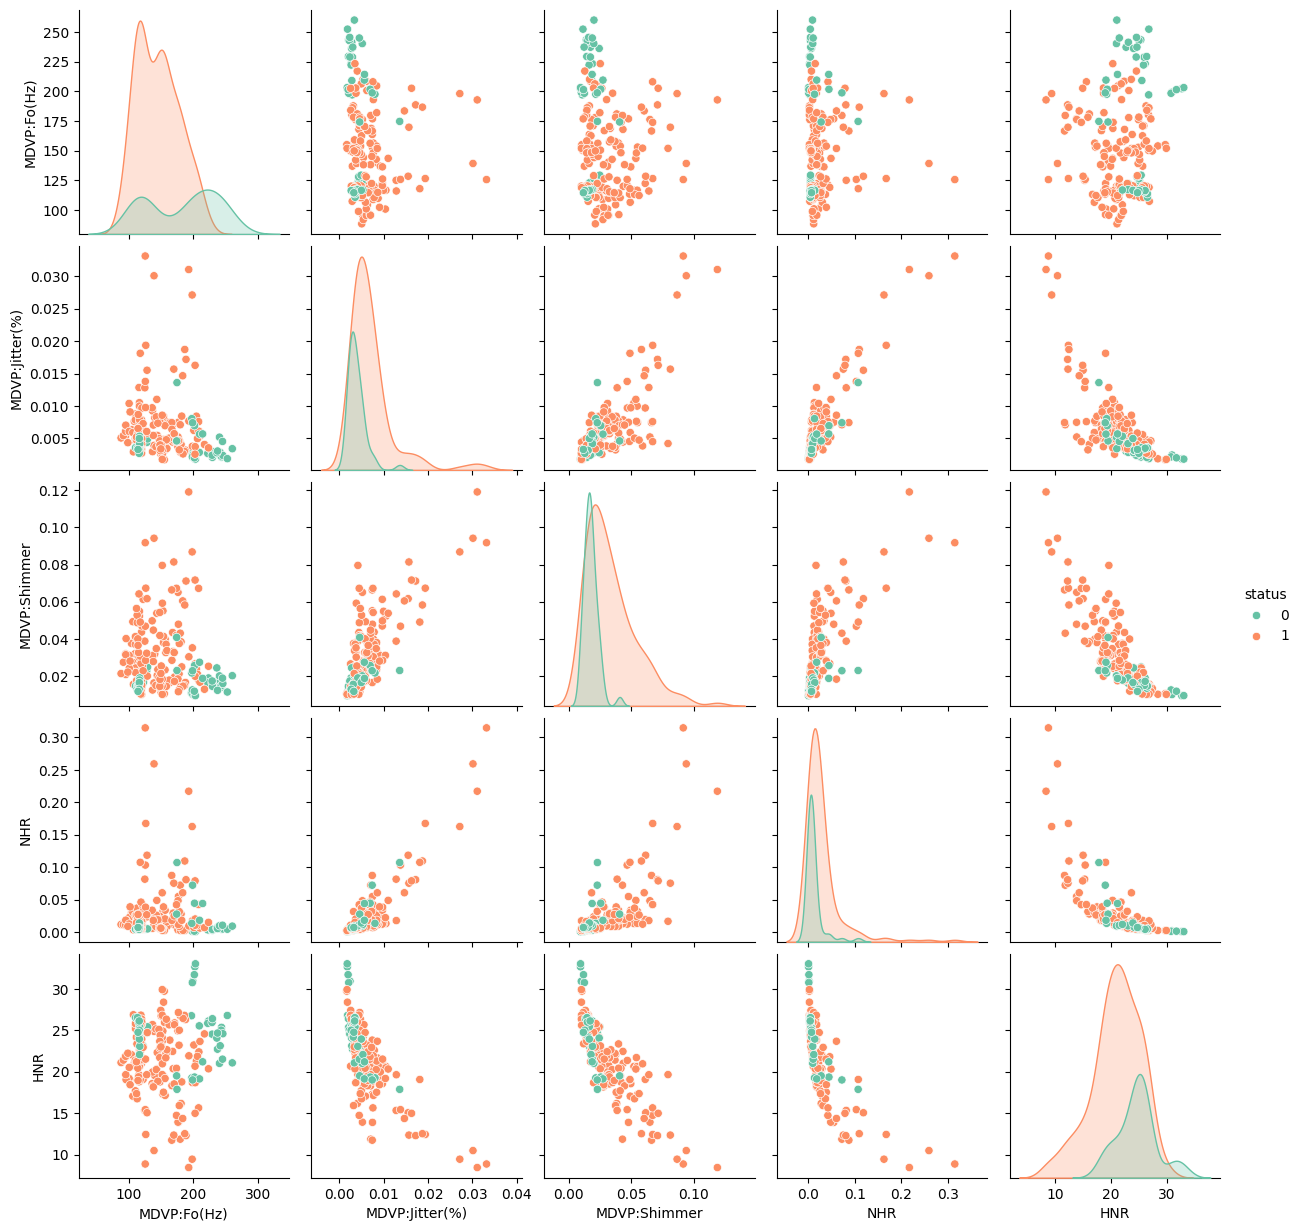

In [13]:
selected_features = ['MDVP:Fo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Shimmer', 'NHR', 'HNR', 'status']
sns.pairplot(df[selected_features], hue='status', palette='Set2')


Distribution of plots for Acoustic Features

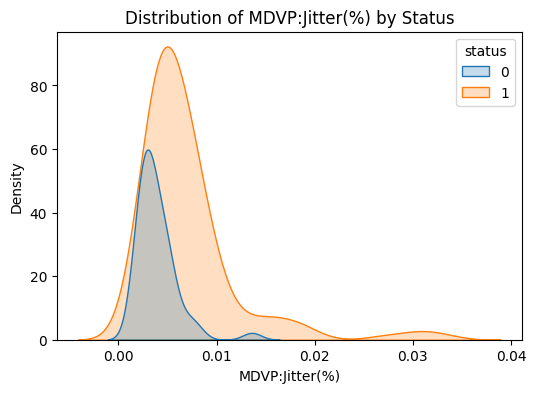

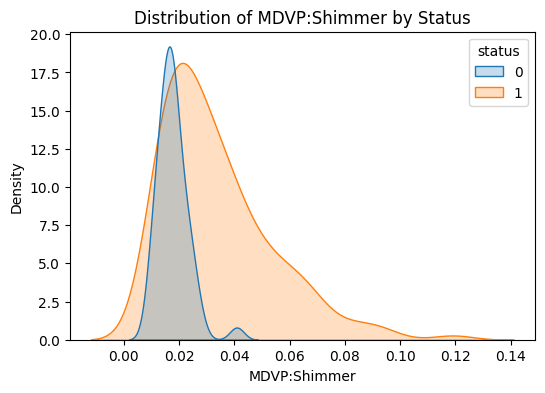

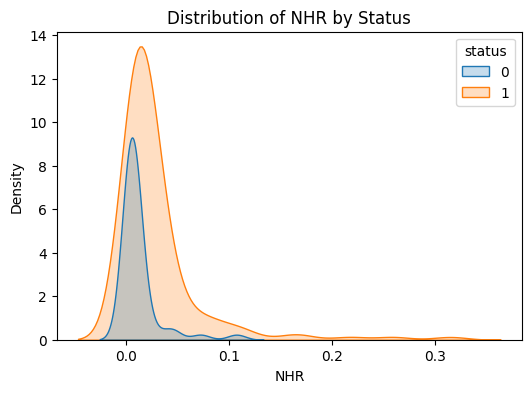

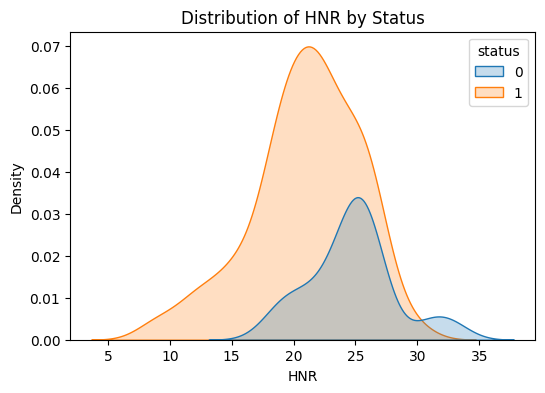

In [14]:
acoustic = ['MDVP:Jitter(%)', 'MDVP:Shimmer', 'NHR', 'HNR']
for col in acoustic:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=col, hue='status', fill=True)
    plt.title(f'Distribution of {col} by Status')
    plt.show()
